In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
import copy

# Load dữ liệu từ file CSV
data = pd.read_csv('Data.csv')

# Chọn window và thuộc tính
window_size = 7
features = [ "Max Temp","Avg Temp" ,"Min Temp","Max Dew Point", "Avg Dew Point","Min Dew Point"]
target = 'Avg Temp'
# Chuẩn bị dữ liệu
x = data[features].values
y = data[target].values

# Chia thành train set và test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
x_train, y_train = np.array(x_train), np.array(y_train)
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaler = scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [2]:
# Chuyển đổi dữ liệu thành các cửa sổ
trainX = []
trainY = []

for i in range(window_size, len(x_train)+1):
    trainX.append(x_train[i - window_size:i, :])
    trainY.append(x_train[i - 1:i,0])
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (698, 7, 6).
trainY shape == (698, 1).


In [3]:
testX = []
for i in range(window_size, len(x_test)+1):
    testX.append(x_test[i - window_size:i, :])
testX = np.array(testX)
print('testX shape == {}.'.format(testX.shape))

testX shape == (171, 7, 6).


In [4]:
# Xây dựng mô hình LSTM
model_LSTM = load_model("LSTM.h5")

In [ ]:
model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               42800     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 5)                 255       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 48,111
Trainable params: 48,111
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred = model_LSTM.predict(testX)
print(pred)

In [16]:
prediction_copies = np.repeat(pred, len(features), axis=-1)
predicted = scaler.inverse_transform(prediction_copies)[:,features.index(target)]
print(scaler.inverse_transform(prediction_copies))

[[90.08427  81.62069  74.09363  73.59831  69.50018  61.645126]
 [91.03969  82.42218  75.155205 74.71297  70.63606  63.29057 ]
 [88.11118  79.96549  71.90131  71.29638  67.1544   58.247032]
 ...
 [92.910835 83.99187  77.23426  76.89597  72.860664 66.51311 ]
 [92.90106  83.983665 77.2234   76.88457  72.84904  66.49626 ]
 [92.7757   83.8785   77.084114 76.73832  72.7      66.28037 ]]


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Scale = MinMaxScaler()

# Tính và hiển thị MAE
mae = mean_absolute_error(Scale.fit_transform(y_test.reshape(-1, 1)[6:]), Scale.fit_transform(predicted.reshape(-1, 1)))
print("Mean Absolute Error (MAE):", mae)

# Tính và hiển thị MSE
mse = mean_squared_error(Scale.fit_transform(y_test.reshape(-1, 1)[6:]), Scale.fit_transform(predicted.reshape(-1, 1)))
print("Mean Squared Error (MSE):", mse)

# Tính và hiển thị R2
r2=r2_score((y_test[6:]), (predicted))
print("R Square:", r2)

Mean Absolute Error (MAE): 0.10090751967726436
Mean Squared Error (MSE): 0.015539488743267355
R Square: 0.7607007265189143


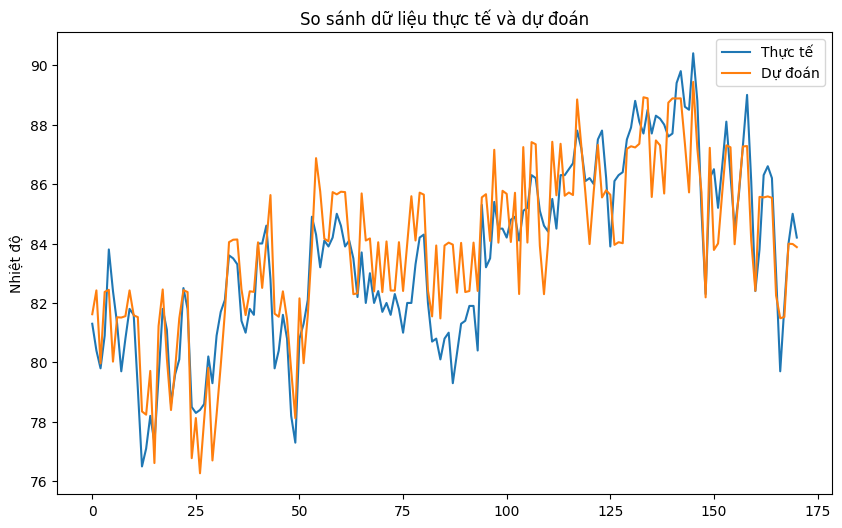

In [18]:
import matplotlib.pyplot as plt

# Tạo array index cho biểu đồ
index = range(len(pred))
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(index, y_test[6:], label='Thực tế')
plt.plot(index, predicted, label='Dự đoán')
plt.xlabel('')
plt.ylabel('Nhiệt độ')
plt.title('So sánh dữ liệu thực tế và dự đoán')
plt.legend()
plt.show()

In [ ]:
# def check_train(model,train_x,train_y):
#   model.fit(train_x,train_y, epochs=5, batch_size=64, verbose=0, shuffle=False)
#   model.reset_states()
#   pred = model.predict(testX)
#   prediction_copies = np.repeat(pred, len(features), axis=-1)
#   predicted = scaler.inverse_transform(prediction_copies)[:,features.index(target)]
#   check = r2_score(y_test[6:], predicted)
#   return check

In [19]:
n_days_for_prediction = 7
window_for_predict = testX[-1:]
predicted_future = []

In [20]:
prediction_copies = np.repeat(pred, len(features), axis=-1)
predicted = scaler.inverse_transform(prediction_copies)

In [21]:
for i in range (0,n_days_for_prediction):
  value_predicted = model_LSTM.predict(window_for_predict)
  # test_model = copy.copy(model_LSTM)
  # if(check_train(test_model,window_for_predict,value_predicted)>r2):
  #   print("change")
  #   model_LSTM.fit(window_for_predict,value_predicted, epochs=5, batch_size=64, verbose=0, shuffle=False)

  value_copy = np.repeat(value_predicted, len(features), axis=-1)
  result_predicted = scaler.inverse_transform(value_copy)
  predicted_future = np.append(predicted_future,result_predicted[:,features.index(target)], axis=0)

  window_for_predict = np.delete(window_for_predict, 0, axis=1)
  window_for_predict = np.append(window_for_predict,np.reshape(value_copy, (1, 1, len(features))), axis=1)

1/1 [==============================] - 0s 23ms/step


<ipython-input-22-58540608ac12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


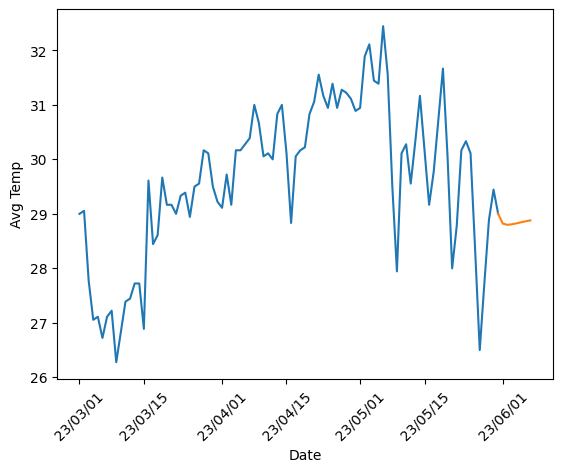

In [22]:
import seaborn as sns
import matplotlib.dates as mdates
original = data[['Date', 'Avg Temp']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2023-3-1']

forecast_period = pd.date_range(list(original['Date'])[-1], periods=n_days_for_prediction+1, freq='1d').tolist()

sns.lineplot(original, x = original['Date'], y = (original['Avg Temp']-32)*(5/9))
sns.lineplot(x = forecast_period, y = (np.insert(predicted_future, 0, y[-1:])-32)*(5/9))
# Định dạng lại nhãn trục x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d'))

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần

plt.show()